In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction propres
#!pip install import-ipynb   # Décommenter la ligne si une erreur sur le package 'import_ipynb' apparait
import import_ipynb
from P3_04_my_functions import *

# Voilà
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
from __future__ import print_function

%matplotlib inline
sns.set()

importing Jupyter notebook from P3_04_my_functions.ipynb


In [3]:
data_0 = pd.read_csv('openfood.csv', sep="\t",low_memory=False) 

In [4]:
data = pd.read_csv("datav1.csv")

# Repartition des données par pays

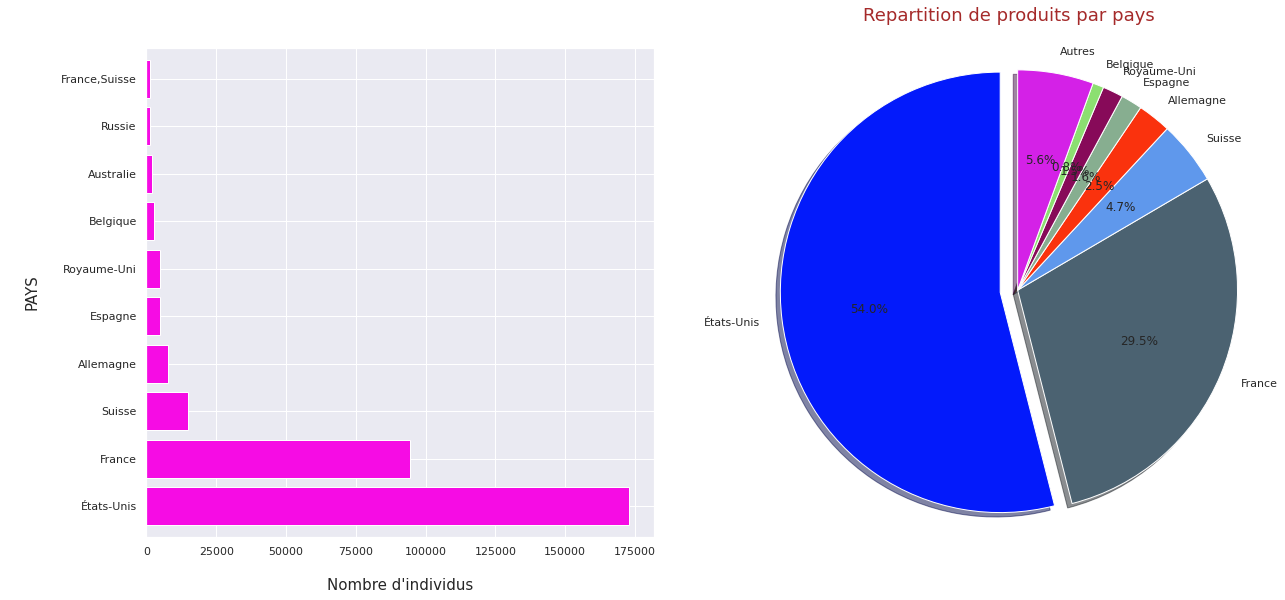

In [5]:
def hist_h(nb_pays=10) :
    x = data_0['countries_fr'].value_counts()
    cut = 7
    plt.figure(figsize=(20,9))
    plt.subplot(1,2,1)
    x.head(nb_pays).plot(kind='barh' , width=0.8,color=couleur_léatoire_hex())
    plt.xlabel("\nNombre d'individus", size=15)
    plt.ylabel("\nPAYS\n", size=15)
    plt.subplot(1,2,2)
    if nb_pays < cut:
        val , labl = np.append( x.values[:nb_pays+1], np.sum(x.values[nb_pays+1:]) ) , np.append(x.index[:nb_pays+1] , "Autres")
    else :
        val , labl = np.append( x.values[:cut], np.sum(x.values[cut:]) ) , np.append(x.index[:cut] , "Autres")
    camemberg( sizes=val , labels=labl , titre="Repartition de produits par pays\n")
    
    
    plt.show()
    
interact(hist_h,nb_pays=(3,50,1));

# Exploration des données

In [6]:
line_number = widgets.IntSlider(min=1 , max=11, step =2 , value = 3, description ="lignes :")
countries = widgets.Dropdown(options=['France', 'USA',  'Allemagne',"Chine", 'Suisse', 'Angleterre',"Espagne" ] , description ="Pays :")
hb = widgets.HBox( [countries ,line_number ] )

def choix_du_pays (lignes ,pays='France' ) :
    global data_0
    if pays =='France' :
        data = data_0[data_0['countries']=='France']
    elif pays =='Suisse' :
        data =  data_0[data_0['countries']=='Suisse']
    elif pays =='USA' :
        data =  data_0[data_0['countries']=='United States']
    elif pays =='Allemagne' :
        data =  data_0[data_0['countries']=='Germany']
    elif pays =='Angleterre' :
        data =  data_0[data_0['countries']=='United Kingdom' ]
    elif pays =='Espagne' :
        data =  data_0[data_0['countries']=='Spain' ]
    elif pays =='Chine' :
        data =  data_0[data_0['countries']=='China' ]
    display( widgets.Label(f"{data.shape[0]}  lignes et {data.shape[1]} variables", disabled=False , size=10),data.head(lignes))
    
    #return data.select_dtypes(include=[float])

w0 = widgets.interactive_output( choix_du_pays, {"pays" : countries , "lignes" : line_number } )
display( hb ,w0)

Label(value='77292  lignes et 162 variables')

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221773,2015-01-25T21:36:13Z,1473538082,2016-09-10T20:08:02Z,Twix x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,0000005200016,http://world-fr.openfoodfacts.org/produit/0000...,sigoise,1441186657,2015-09-02T09:37:37Z,1442570752,2015-09-18T10:05:52Z,lentilles vertes,NaN,1 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Output()

# Valeurs manquantes par lignes ( individus/reférence ) et par colonnes ( variables )

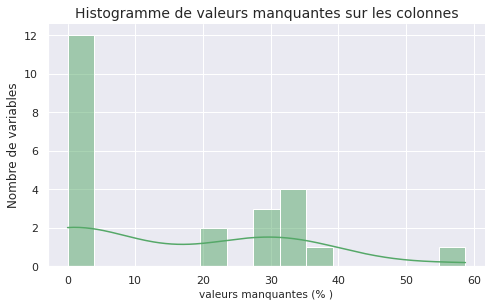

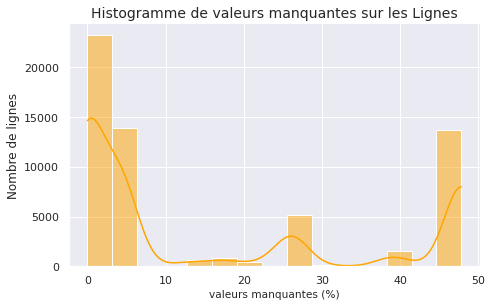

Output()

In [7]:
n_bar = widgets.IntSlider(min = 5,max=150,value = 15 , step=1, description ="Nbr_bar")
hauteur = widgets.IntSlider(min=1,max=10,step=1 ,value= 4 ,description="Hauteur")
largeur = widgets.IntSlider(min=3,max=20,step=1 ,value= 7 ,description="largeur")
hb = widgets.HBox([n_bar,hauteur,largeur])

def bar_plot( n_bar ,h = 5 , L = 10 ) :
    global data
    sns.displot( data.isna().mean()*100, kde=True,color='g', bins=n_bar, height=h, aspect=L/h)
    plt.xlabel('valeurs manquantes (% )', size= 1.5*L)
    plt.ylabel("Nombre de variables", size =3*h)
    plt.title("Histogramme de valeurs manquantes sur les colonnes",size=2*L)
    
    sns.displot( data.isna().mean(axis=1)*100, kde=True,color='orange', bins=n_bar, height=h, aspect=L/h )
    plt.xlabel('valeurs manquantes (%)', size= L*1.5)
    plt.ylabel("Nombre de lignes", size =3*h)
    plt.title("Histogramme de valeurs manquantes sur les Lignes",size=2*L)
    plt.show()
    
w0 = widgets.interactive_output( bar_plot , {"n_bar" : n_bar  , "h": hauteur , "L" : largeur } ) 
display(hb,w0)

# Effectif par `score nutriaddi`

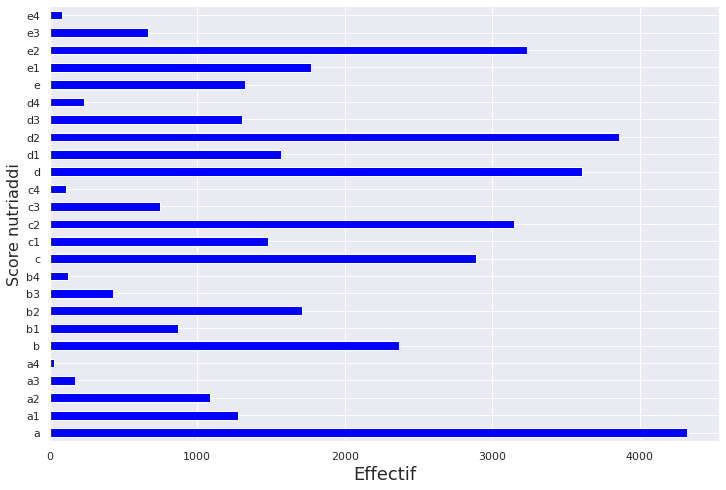

Output()

In [8]:
hauteur = widgets.IntSlider(min = 1 , max=15 , step =1 , value= 8, description="hauteur")
largeur = widgets.IntSlider(min=3 , max=25,step=1,value=12,description="largeur")
couleur = widgets.ColorPicker( concise=False, description='Couleur',value='blue', disabled=False )
hb = widgets.HBox([hauteur,largeur,couleur])
def f(h,L,couleur) :
    plt.figure(figsize=(L,h))
    data["score_nutriaddi"].value_counts().sort_index().plot.barh(color=couleur)
    plt.xlabel("Effectif",size = 1.5*L)
    plt.ylabel("Score nutriaddi" , size=2*h)
    plt.show()
    
w0 = widgets.interactive_output(f , {"h":hauteur,"L":largeur,"couleur":couleur})
display(hb , w0)

#  Correlation entre variables numériques : Regroupement selon le nutriscore ou le score nutriaddi

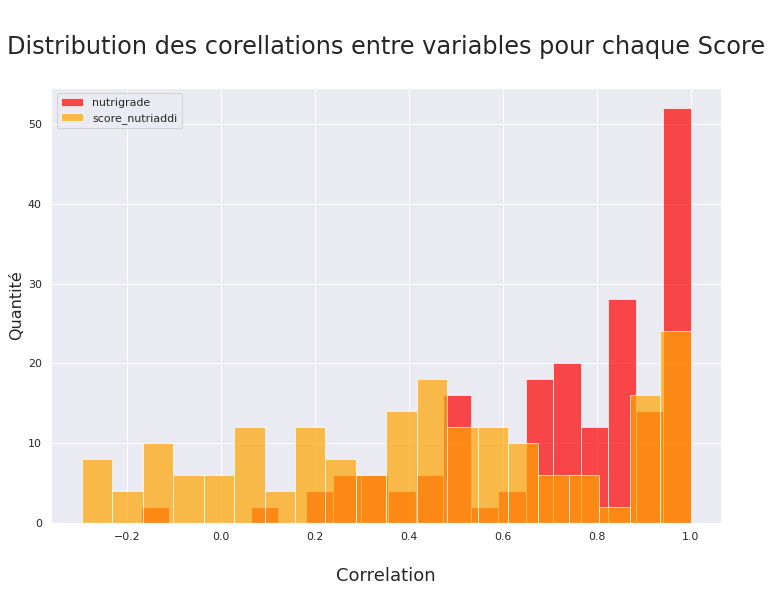

Output()

In [9]:
hauteur = widgets.IntSlider(min = 1 , max=15 , step =1 , value= 8, description="hauteur")
largeur = widgets.IntSlider(min=3 , max=25,step=1,value=12,description="largeur")
nb = widgets.IntSlider(min=3 , max=150,step=1,value=20,description="nb_bar")
transparence = widgets.FloatSlider(min = 0 , max = 1 , value = 0.7 , step = 0.01, description = "visibilité")
couleur = widgets.Dropdown(options=(("red-orange",["red","orange"]),("blue-turquoise",["blue","turquoise"]),("teal-royalblue",["teal","royalblue"]),\
                                    ("gold-aquamarine",["gold","aquamarine"]),("coral-silver",["coral","silver"]),("indigo-darkorange",["indigo","darkorange"]),\
                                    ("darkorange-magenta",["darkorange","magenta"]),("darkorange-blue",["darkorange","blue"])) , description="Couleur")

vb = widgets.VBox([hauteur,largeur])
hb = widgets.HBox([vb,transparence ,nb, couleur ])
def g (h,L,trans,couleur ,n ) :
    plt.figure(figsize=(L,h))
    plt.hist(data.groupby ( ["nutrition_grade_fr"] ).mean().corr().values.ravel(), bins=n ,label='nutrigrade',alpha=trans,color =couleur[0])
    plt.hist(data.groupby ( ["score_nutriaddi"] ).mean().corr().values.ravel(), bins=n ,label='score_nutriaddi',alpha=trans,color =couleur[1])
    plt.xlabel("\nCorrelation",size=1.5*L)
    plt.ylabel("Quantité",size=2*h)
    plt.title("\nDistribution des corellations entre variables pour chaque Score\n",size=2*L)
    plt.legend()
    plt.show()

w1 = widgets.interactive_output(g , {"h":hauteur,"L":largeur,"trans":transparence,"couleur":couleur,"n":nb} )
display(hb,w1)

# Heatmap des Correlation entre variables

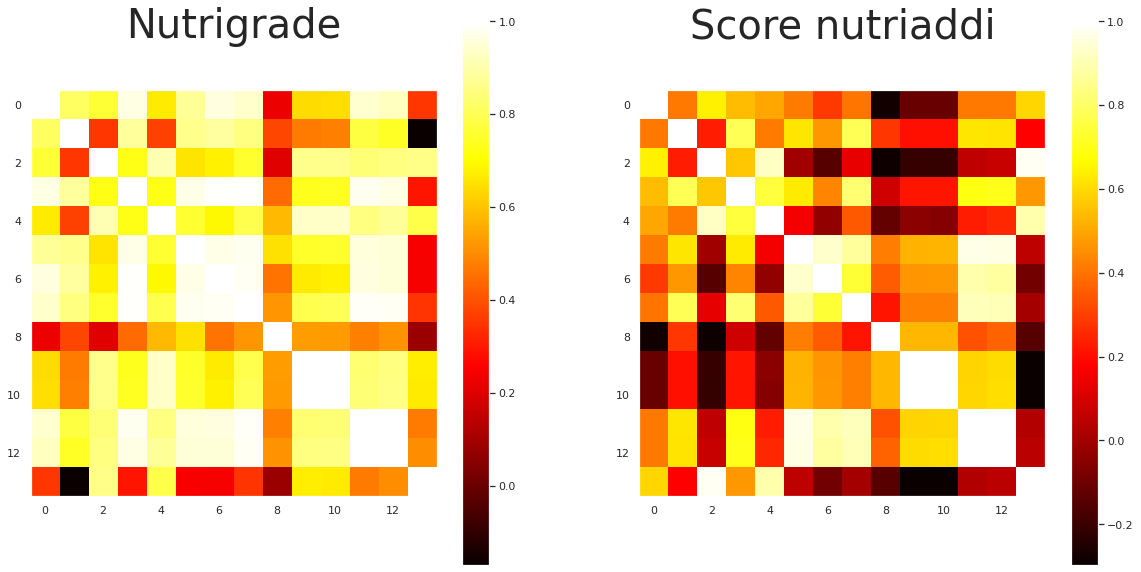

Output()

In [10]:
a=('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r')
'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
hauteur = widgets.IntSlider(min = 1 , max=20 , step =1 , value= 10, description="hauteur")
largeur = widgets.IntSlider(min=3 , max=35,step=1,value=20,description="largeur")
grille =  widgets.Checkbox(value=False, description='grille', disabled=False )
style = widgets.Dropdown(options=a ,value = "hot" ,description="Style")
vb = widgets.VBox([hauteur,largeur])
hb = widgets.HBox([vb,style,grille,])

def g (h , L , styl ,grid) :
    plt.figure(figsize=(L,h))
    plt.subplot(1,2,1)
    plt.grid(visible=grid)
    plt.imshow(data.groupby ( [ "nutrition_grade_fr" ] ).mean().corr(), cmap=styl )
    plt.title('Nutrigrade\n' , size=2*L)
    plt.colorbar()
    plt.subplot(1,2,2)
    plt.grid(visible=grid)
    plt.title('Score nutriaddi\n' , size=2*L)
    plt.imshow(data.groupby ( [ "score_nutriaddi" ] ).mean().corr(), cmap=styl  )
    plt.colorbar()
    plt.show()

    
w0 = widgets.interactive_output(g , {"h":hauteur,"L":largeur,"styl":style,"grid":grille,})
display(hb,w0)
